In [1]:
import networkx as nx

In [2]:
G=nx.Graph()

In [3]:
G=nx.read_adjlist("dataset.txt")

In [4]:
type(G) 

networkx.classes.graph.Graph

In [5]:
len(G.nodes())

22353

In [6]:
len(G.edges())

20052

In [7]:
for n in G.nodes():
  if(n[:1]=='p'):
    G.nodes[n]['bipartite'] = 'projects'
  else:
    G.nodes[n]['bipartite'] = 'users'

In [49]:
#To count number of users and projects in our dataset
def get_nodes_from_partition(G,partition):
    nodes = []
    for n in G.nodes():
        if G.nodes[n]['bipartite'] == partition:
            #if the node belogs to given partition, then the node is added to nodes list
            nodes.append(n)
    return nodes

print(len(get_nodes_from_partition(G, 'users')))
print(len(get_nodes_from_partition(G, 'projects')))

10721
11632


In [9]:
def shared_partition_nodes(G, n1, n2):
    #Checking whether passed nodes belong to users partition or not
    assert G.nodes[n1]['bipartite'] =='users' 
    assert G.nodes[n2]['bipartite'] =='users'

    # Getting neighbors of node1
    nbr1 = G.neighbors(n1)
    # Getting neighors of node2
    nbr2 = G.neighbors(n2)

    # TO get shared projects between users
    common = set(nbr1).intersection(nbr2)
    return common

In [10]:
def user_similarity(G, u1, u2, proj_nodes):
    #Checking whether passed nodes belong to users partition or not
    assert G.nodes[u1]['bipartite'] == 'users'
    assert G.nodes[u2]['bipartite'] == 'users'

    # TO get shared projects between given users
    shared_nodes = shared_partition_nodes(G, u1, u2)

    # return similarity score
    return len(shared_nodes) / len(proj_nodes)

In [11]:
from collections import defaultdict

def most_similar_users(G, user, user_nodes, proj_nodes):
      #Checking whether passed nodes belong to users partition or not
    assert G.nodes[user]['bipartite'] == 'users'

    # Getting other user nodes
    user_nodes = set(user_nodes)
    user_nodes.remove(user)

    # Creating dictionary 
    similarities = defaultdict(list)
    for n in user_nodes:
        similarity = user_similarity(G, user, n, proj_nodes)
        similarities[similarity].append(n)

    # computing maximum similarity
    max_similarity = max(similarities.keys())
    
    #  returing maximum similarity users
    return similarities[max_similarity]

user_nodes = get_nodes_from_partition(G, 'users')
project_nodes = get_nodes_from_partition(G, 'projects')

In [12]:
def recommend_repositories(G, from_user, to_user):
    # repositiores of user1
    from_repos = set(G.neighbors(from_user))
    #repositiories of user2
    to_repos = set(G.neighbors(to_user))

    print("Suggesting repositiories to user1")
    print(to_repos.difference(from_repos))
    print("Suggesting repositiories to user2")
    print(from_repos.difference(to_repos))

In [46]:
G1=nx.Graph()

In [47]:
def draw_graph(user1,user2):  
  G1.add_node(user1)
  G1.add_node(user2)
  repos1=G.neighbors(user1)
  repos2=G.neighbors(user2)
  for n in repos1:
     G1.add_node(n)
     G1.add_edge(user1,n)
  for n in repos2:
     G1.add_node(n)
     G1.add_edge(user2,n)
  #nx.draw(G1,with_labels=True)
  nx.draw(G1,node_color="red",with_labels=True,node_size=1000) 

Number of Shared repositiories
2
Similarity Score
0.000171939477303989
Recommending repositories
Suggesting repositiories to user1
{'p1099', 'p33205', 'p10000', 'p2692'}
Suggesting repositiories to user2
{'p12646', 'p557', 'p8462', 'p12244', 'p3320', 'p35264', 'p28114', 'p26797', 'p362', 'p11138', 'p3273', 'p31355', 'p2122', 'p79037', 'p2542', 'p1427', 'p31168', 'p7070', 'p5820', 'p28811', 'p64681', 'p18733', 'p5013', 'p29590', 'p2045', 'p17699', 'p16236', 'p4630', 'p37051', 'p5737', 'p22118', 'p744', 'p44164', 'p41253', 'p4930', 'p1496', 'p22130', 'p9717', 'p5395'}


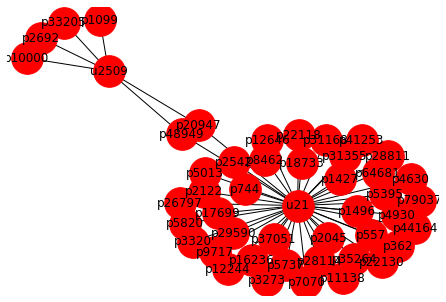

In [48]:
user1='u21'
user2='u2509'
print("Number of Shared repositiories")
print(len(shared_partition_nodes(G,user1,user2)))
print("Similarity Score")
project_nodes = get_nodes_from_partition(G, 'projects')
similarity_score = user_similarity(G,user1,user2, project_nodes)
print(similarity_score)
print("Recommending repositories")
recommend_repositories(G,user1,user2)

draw_graph(user1,user2)